In [59]:
!pip install scikit-optimize

In [60]:
# ======================================
# 1. Import Libraries
# ======================================

In [61]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ExpSineSquared, DotProduct, ConstantKernel, RationalQuadratic
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from itertools import product
from skopt import gp_minimize
from skopt.space import Real

In [62]:
# ======================================
# 2. Add updated inputs for function-1
# ======================================

In [63]:
inputs1 = np.array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397],
       [0.000025, 0.000025],
       [0.001200, 0.001200],
       [0.110000, 0.110000],
       [0.000100, 0.000100],
       [0.080000, 0.080000],
       [0.060000, 0.060000],
       [0.006000, 0.006000],
       [0.000050, 0.000050],
       [0.004000, 0.004000],
       [0.003000, 0.003000],
       [0.001000, 0.001000],
       [0.100000, 0.100000]])

In [64]:
# ======================================
# 2. Add updated outputs for function1
# ======================================

In [65]:
outputs1 = np.array([ 1.32267704e-079,  1.03307824e-046,  7.71087511e-016,
        3.34177101e-124, -3.60606264e-003, -2.15924904e-054,
       -2.08909327e-091,  2.480927586447392e-248,  3.60677119e-081,
        6.22985647e-048, 7.157768931910551e-247,
        1.5120729957076705e-135, 3.0778671018359276e-248,
        0, 1.9485359663135148e-163, 2.6547153481304677e-183,
        4.965876793524349e-241, 2.665832831956631e-248, 1.92084277825704e-243, 1.165140364533758e-244, 4.047877776558732e-247,
        2.244422822053609e-144])

In [66]:
# ======================================
# 3. Converting to absolute values
# ======================================

In [67]:

X = inputs1
y = np.abs(outputs1)

In [68]:
# ======================================
# 4. Plotting input and output on a graph
# ======================================

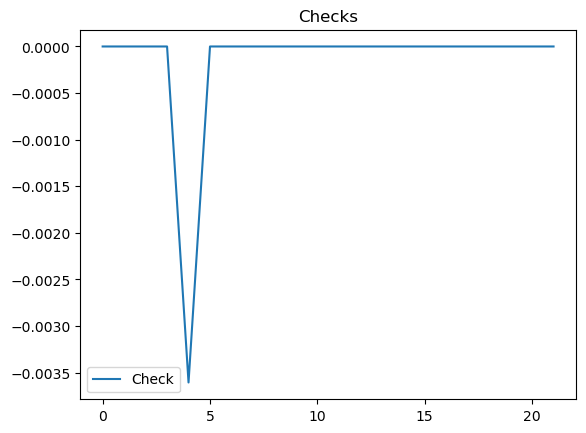

In [69]:
df = pd.DataFrame(outputs1, columns = ['Check'], index = range(outputs1.size))
plot = df.plot(title="Checks")

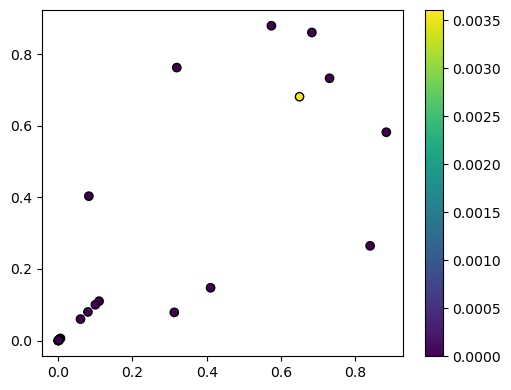

In [70]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="viridis")

plt.colorbar()

plt.tight_layout()
plt.show()

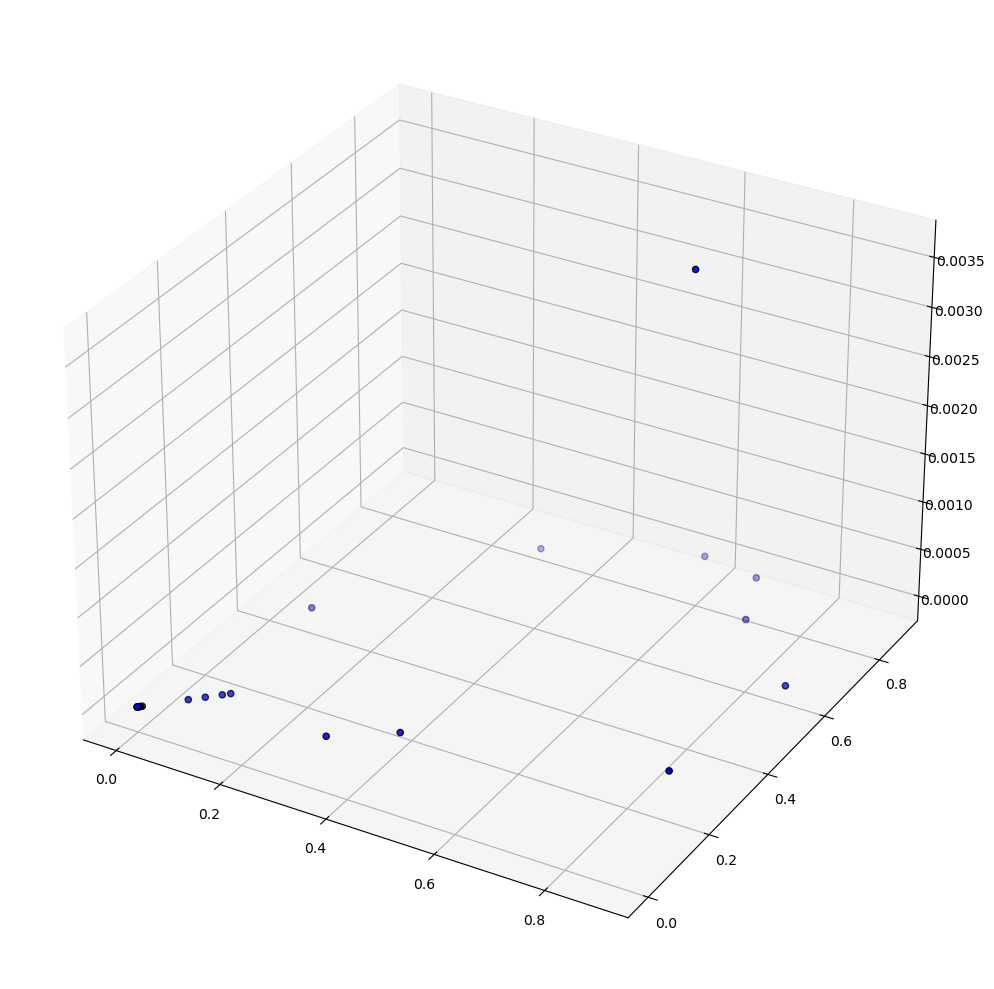

In [71]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c = 'blue', edgecolors="k")

plt.tight_layout()
plt.show()

In [72]:
#Define kernel used
kernel_best_Q1_RBF = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(length_scale=[0.05, 0.05], length_scale_bounds=(1e-2, 1e2))

#Initialize Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel_best_Q1_RBF, n_restarts_optimizer=30, alpha=1e-6, normalize_y=True)

#Fit to data
gp.fit(X, y)

#Print the kernel to check if the value of optimized kernel is normal 
print("Optimized kernel:", gp.kernel_)

C:\Users\Soumitro Mukherjee\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Optimized kernel: 1.68**2 * RBF(length_scale=[100, 0.0488])


C:\Users\Soumitro Mukherjee\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [73]:
#define UCB
def ucb(X_candidates, gp, kappa=2.0):
    mu, sigma = gp.predict(X_candidates, return_std=True)
    return mu + kappa * sigma

#Generate candidate points (dense grid in [0,1]^2)
x1 = np.linspace(0, 1, 4000)
x2 = np.linspace(0, 1, 4000)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

# Compute UCB
ucb_values = ucb(X_grid, gp, kappa=3)

# Pick next query point (max UCB)
next_point = X_grid[np.argmax(ucb_values)]
print("Next query point (by UCB):", next_point)

Next query point (by UCB): [0.         0.64791198]
